In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

import time, os, urllib

def fetch_google_images(query, max_images, save_dir):
    # 크롬 옵션 설정
    options = webdriver.ChromeOptions()
    # ✅ 브라우저를 실제로 띄움
    # options.add_argument('--headless')  ← 제거!
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument(
        "user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
        "(KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    )

    # 드라이버 실행
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
    driver.get(f"https://www.google.com/search?q={query}&tbm=isch")
    time.sleep(2)

    # 스크롤 다운 반복
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

    # 이미지 태그 수집 (전체 img 태그 대상)
    imgs = driver.find_elements(By.TAG_NAME, "img")
    print(f"[🔎] Found {len(imgs)} image tags for '{query}'")

    os.makedirs(save_dir, exist_ok=True)
    count = 0

    for img in imgs:
        try:
            src = img.get_attribute("src")
            if src and "http" in src:
                urllib.request.urlretrieve(src, os.path.join(save_dir, f"{query.replace(' ', '_')}_{count}.jpg"))
                print(f"  [{count}] Saved: {src}")
                count += 1
                if count >= max_images:
                    break
        except Exception:
            continue

    driver.quit()
    print(f"[✅] {count} images saved for '{query}'")


In [2]:
# 🍎 수집할 36개 음식 클래스 리스트
classes = [
    "apple", "banana", "beetroot", "bell pepper", "cabbage", "capsicum",
    "carrot", "cauliflower", "chilli pepper", "corn", "cucumber", "eggplant",
    "garlic", "ginger", "grapes", "jalapeno", "kiwi", "lemon", "lettuce", "mango",
    "onion", "orange", "papaya", "passion fruit", "pear", "peas", "pineapple",
    "pomegranate", "potato", "raddish", "soy beans", "spinach", "sweet potato",
    "tomato", "turnip", "watermelon"
]


🔄 Crawling images for: apple
[🔎] Found 1357 image tags for 'apple'
  [0] Saved: https://www.google.com/tia/tia.png
  [1] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSVCda3s5PHIRsB7yPaOdbY4RS-MnQcLha21TOE5RuckXyUHlIGmFgBU93T&s
  [2] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSGVITlzgr9Da--XHyGy7AD8Wt7iLEYemwgZRDm3r2NUbyoAD-t2Y18FwBz&s
  [3] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSu7b3A0WB2QEEyRw-JS0VHu4Pa2H1qSqVTNE0McrCGerQdPQhWHTvCGYBc&s
  [4] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQYPwYV2vtwTFQbxFTotnztr88xs1nuYJ8IWDRK38nj15yF1yyS92q4caY4&s
  [5] Saved: https://fonts.gstatic.com/s/i/productlogos/googleg/v6/24px.svg
  [6] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSUl8HOt7JW9k7uGB23FN6Yuc5fduB6cInFgA&s
  [7] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTMIXDoQrteidJckaKVAK65Mntk6811jmWTtQ&s
  [8] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRcMJIqxbeqvkRT6Yt

  [12] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFWRf5xYfzFGooC8-1I_SzvoCByK-JrxMMKg&s
  [13] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTOvfIy5HZrr6qPyExShT6YX8ZG6RF7D3byPQ&s
  [14] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSnb5yyAJpC5U7Gq1Zb1nBCQ4X0ST9Z9u3RKw&s
  [15] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT32fi6ym1c1oFgG_VFw0H0qhVior-s9RUEfQ&s
  [16] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTON_7U5qiYEMxgI7KC9mJ84FIwP01haJOt0A&s
  [17] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwS_R9n54fRLwnO1qcIYM0nfen0iAxrgD3Rg&s
  [18] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQey4Z6e7iPp9QZWDK5rzWpnpfkDuUBz7E4ig&s
  [19] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR42RjOTmsHlpLiQCqjH38Cu4AjnpI77fQGug&s
  [20] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRLHLBaozsGsD7H5-kpCacY5MXJWp6dBEPXVioaTiGb&s=0
  [21] Saved: https://encrypt

  [25] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcStkk4hKI8rL1D8P_6mK0amjCsIz82pP2gkrg&s
  [26] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQY1-f0IvjFJRDHsyPAfLpD6XRpExBLW8O2yw&s
  [27] Saved: https://encrypted-tbn2.gstatic.com/faviconV2?url=https://au.atkins.com&client=IMAGE_SEARCH&size=16&type=FAVICON&fallback_opts=TYPE,SIZE,URL
  [28] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFh1Be9eZzGHNlQ9j32_l7hXoGBnHlBuup6A&s
  [29] Saved: https://encrypted-tbn1.gstatic.com/faviconV2?url=https://natureandnurtureseeds.com&client=IMAGE_SEARCH&size=16&type=FAVICON&fallback_opts=TYPE,SIZE,URL
[✅] 30 images saved for 'cabbage'

🔄 Crawling images for: capsicum
[🔎] Found 1315 image tags for 'capsicum'
  [0] Saved: https://www.google.com/tia/tia.png
  [1] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQUDQJW6zI60rdBQ6XigiDnvyBCwmXRRea6oJZz79X5jpduUmyxBJ38z3v4&s
  [2] Saved: https://fonts.gstatic.com/s/i/productlogos/googleg/v6/24px.svg
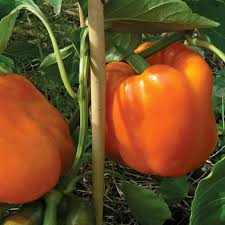

  [4] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSVVfxwY5KSJazNnB-7vpZbhkeSoZF14XoQ0Q&s
  [5] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQCtMxDVtWB5_8U9uZtfKQqvcpcYxeFnSdNhw&s
  [6] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSh7MGPCs44aBR1mFw2mM79epjWaY7UxphrrA&s
  [7] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQxGRxV6i7b_lUlLZg01F9k-qERlJXQVyoyrQ&s
  [8] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQJ53XPz6A_X15DLGBxbJXR-Y2hb2MboXeDQ&s
  [9] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQwuX476JzeNqSwBh6v6AvfK3AWOZZUXApYWA&s
  [10] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQz79bnA6DZf0t8JLHJri-Ot8Er1X_pQrleYg&s
  [11] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSEfNmgy-1JMibaKwe3NhYjIN6_9n8IZv_p7Q&s
  [12] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRq0uHYWll2JYrjxO86v9GwtPmw-uJYWmpYdw&s
  [13] Saved: https://encrypted-tbn0.gstati

  [16] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR4yl0i-aD5Vi5EZsYEX_vrsxY2C3QT97HUIQ&s
  [17] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRLJe28Y301f4iUeCutXOvH-R99h2NGHEUXbQ&s
  [18] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT6ZJMg5EujRQWt03NS7Gi2jRDWhq2HBJf0kw&s
  [19] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTr_JVVJ_EJTZmuKkHlimhmRNZ9xrr5y60xukZzapAlv3vI1ZCz8t3c&s=0
  [20] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTajE42wZk0qRyyoLgz_OUF_FKYI6psLLkl082QI4ZmtBMibvKouaee&s=0
  [21] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ4HDG27AT4vvuIX2S9-3xgI2DA9amDYh4utiVpdsmLS4Mtzbjzhpuz&s=0
  [22] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSmcdrEU148iGgIkAUN0OMfKoFLZN9RLpQFow&s
  [23] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS9H3GAyhzqvrYQanMDTe05s0SaZxupA6ywJA&s
  [24] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSR5s2hOQaBALBjop

  [27] Saved: https://encrypted-tbn0.gstatic.com/faviconV2?url=https://www.everydayhealth.com&client=IMAGE_SEARCH&size=16&type=FAVICON&fallback_opts=TYPE,SIZE,URL
  [28] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTh0HJTZQ4zG1vUgI_GLUjqjTatuTYZtWxdfA&s
  [29] Saved: https://encrypted-tbn2.gstatic.com/faviconV2?url=https://www.westcoastseeds.com&client=IMAGE_SEARCH&size=16&type=FAVICON&fallback_opts=TYPE,SIZE,URL
[✅] 30 images saved for 'corn'

🔄 Crawling images for: cucumber
[🔎] Found 1996 image tags for 'cucumber'
  [0] Saved: https://www.google.com/tia/tia.png
  [1] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPp1hA7-XtvX8BzCx3YjPZCpf0NLUv1mziBmyPW51Dznm9Wyn6jL4TEjn1&s
  [2] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7u6pD5ly4GwBU1hDgPO8AVBs0VcTtSQnVrY_A_Z0pH4N4VGKQ0LD9Ak24&s
  [3] Saved: https://fonts.gstatic.com/s/i/productlogos/googleg/v6/24px.svg
  [4] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzbviAZ3yAzWDLv

  [8] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTF5nCyr6udYSETciDIMjFHtfip8a7XcyfhZg&s
  [9] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQK220M_wkoRIR07vJaxTPO7kjGZsz5F2_jGQ&s
  [10] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTnJwC_hQEIjjJOB92irYUcGQaaiWLJfPdLZg&s
  [11] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRyxAW9ZRuTWNsY0jeZXCHUXmqqFYHzBfpFrg&s
  [12] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQb3OGPC6le5Ac9q3PRbDi5zWW77wjqPaVSyA&s
  [13] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRsiNXOASXSzYje9WEcgH7-xfxJ0GqUCHa_PQ&s
  [14] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSDaSTSAAkyJCiKz4eJot4WW-oY6lYpcKt_dg&s
  [15] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQuzAkh2Ut0wOkI7UH6Ep5K0GMRRqL0mhTnig&s
  [16] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSzznisLTeqhYDm0czcZ9ozKiog_5_o6NfqMg&s
  [17] Saved: https://encrypted-tbn0.gs
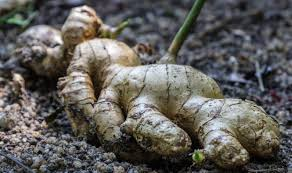

  [3] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQkZ-LtMvaPVkfLjsyU-WYYZ7_6pTJ_4r0lCA&s
  [4] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRNfHD2TAthXkJkX0jbejXRy-shOiABblT3iA&s
  [5] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlc-M3JYmWeLiEgKV7QMY9PYOx8rfGwaO2sA&s
  [6] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSx5x8jSAReoUctcSEEzfZfhgNhscOu9Qv8sA&s
  [7] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSzCBdTsL4pEb_8I2QNFe9K8EZ25qaiHdbZkg&s
  [8] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT2zom2ASUfEICehQkIJXrN9q1LtGzH-2eB2Q&s
  [9] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSG1B67278pQGi_t1A8_Y5S7BtZfOoY0JwSDA&s
  [10] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRjFtmmeCab3BwNu3YbIy6_WbiCbJJSyV9PcQ&s
  [11] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_iXmt5uTrObeXFuyggXRvVBP7Xw7BSZlH0Q&s
  [12] Saved: https://encrypted-tbn0.gstatic

  [15] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSmR95YpoyMKNSwRMlb-WEwB_1SSDNl6-KTsw&s
  [16] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTs2GyGTZAzDIuPvkU2wrZFwmJRzcb-D9-OGQ&s
  [17] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSKy0gR_I0WU47Q-6BTn5FQv6C6PdyZhvZWBA&s
  [18] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSN876uzfU_z_yZ0XoyU9bsTUu6XiZUod-KdA&s
  [19] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQuS0AVrfrspl2lB-kEXsvl2os1wn7BXGfaoQ&s
  [20] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToCsWv3tAk6OlgEs0UPrgJOSLWspzfefllvg&s
  [21] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcThRYpNbM27Huitw9f5jKPHQasSrhlhn6V1Zg&s
  [22] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQHYYe4GQxLAxhFm4JW2IHi8vRwzbpplwxmDA&s
  [23] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQTxZvoTKrL34lNt2lNqBJ1hcc23-Jp7y0DDw&s
  [24] Saved: https://encrypted-tbn0.

  [27] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ024GjXAJTsfMFc-eFk4InbjA5gdhuSxWsAA&s
  [28] Saved: https://encrypted-tbn0.gstatic.com/faviconV2?url=https://www.thesill.com&client=IMAGE_SEARCH&size=16&type=FAVICON&fallback_opts=TYPE,SIZE,URL
  [29] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSfWqz-M2E0Fzv8BqWhbATNeUHv04iBRcV8cA&s
[✅] 30 images saved for 'lemon'

🔄 Crawling images for: lettuce
[🔎] Found 1220 image tags for 'lettuce'
  [0] Saved: https://www.google.com/tia/tia.png
  [1] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSiYS-LgZstqkr7A8YoHeJ8Eej_Beg7msGb5VvqcrF9HlzByOHSWX8D-5cm&s
  [2] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPgFGE5_lHab7ElW1d3NQqN1BrUGMB846hcRWx4AS01Vl3EtZY_qUk60UD&s
  [3] Saved: https://fonts.gstatic.com/s/i/productlogos/googleg/v6/24px.svg
  [4] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR0OksH7FQRHCPvY45gVFglRdTyykXWZT2KOg&s
  [5] Saved: https://encrypted-tbn0.gsta

  [9] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTT45d4GDUFSEHk_QepQZnkvPmYWzvxO3xg7w&s
  [10] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcReMdJ1pOcUHliWXmXsG9ivSUhXT0HaQ65NIQ&s
  [11] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS94Iaqpj8Jnvqx-j20SrALl8v9wfJMkvEAzQ&s
  [12] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJxrth0VrVobwxZK5lw3n0pNXah4IBCrSp-g&s
  [13] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTJpgUL87Reko-X8vu8YdrfsNJIkh6RRdzV4A&s
  [14] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT71eawQ-lehEvJSljCgUt7Ks1_3EBm7kgfdw&s
  [15] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQj0zXDUK7WRv5P9ZTZqTX7UjWnoxPSETZBsuJsVzt2OsZuzq69x_kJ&s=0
  [16] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR0A1vLt4SxKgc4bMiDo818Sanh5u8qh628gKVADDtMIS81rfB_x2TN&s=0
  [17] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjmICmvI6JdIxOiXfIkPPykyX5TmWlRUKSpyv

  [20] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcShB_q7DP3zQjbE_9sAJmQRPyUZ_r2s91DzXA&s
  [21] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRy1M0wTYUOspNTgWf0ciC82sJcU-B8AYAeAQ&s
  [22] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRXSt92XcuJkoT-hLFtcmfyjqKneqYNwVhx0Q&s
  [23] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTiGVSASOH7keNFEsXSukqn7Exl24GyAXh_1A&s
  [24] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ3CnRxau6FyevODGkX6Ndx7HGfZPt44Mo2IA&s
  [25] Saved: https://encrypted-tbn3.gstatic.com/faviconV2?url=https://www.thekitchn.com&client=IMAGE_SEARCH&size=16&type=FAVICON&fallback_opts=TYPE,SIZE,URL
  [26] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSeSaGnwkeLsfooqvPdD8vD_cYhVuEnj2sAwQ&s
  [27] Saved: https://encrypted-tbn2.gstatic.com/faviconV2?url=https://marketplacefresh.com.au&client=IMAGE_SEARCH&size=16&type=FAVICON&fallback_opts=TYPE,SIZE,URL
  [28] Saved: https://encrypted-tbn0

[🔎] Found 1275 image tags for 'peas'
  [0] Saved: https://www.google.com/tia/tia.png
  [1] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRxRhxVMIrj1ei8LWplho9aJ5ixNEjUuE7MXmw1syPOiNoxrKPFEgZ18rIi&s
  [2] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRyCmmRTUWJbuG2giAI0m_oFVbNI1qAN9B5hNm7G_kwe4vEv3ySaDaaHpNV&s
  [3] Saved: https://fonts.gstatic.com/s/i/productlogos/googleg/v6/24px.svg
  [4] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQGuxO7rITyTFRNqLXPaz2RmwdnbLbADn3GPA&s
  [5] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR-RZDLJYCoHiWHJowHXuPZoaJjqXil6JU91A&s
  [6] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSy-Fi3XecZy-wPJFm3_SLYr6FYEfUzxP-zJg&s
  [7] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRfDfvy6DuI6DHRYkfONH1RqT6A-rf2gPOwdQ&s
  [8] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSnw18hACTe7gNoFeL3RlajQc7A7AeK5B5cUA&s
  [9] Saved: https://encrypted-tbn0.gstatic.com/image

  [14] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRMfYIq8XBJdUR1XV5x1-9pmTId7kP0yBpj6SqnmzV7&s=0
  [15] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRADqfOm6kTjTILmCaOu0mwFmMFIX95yTrKUremV-_7&s=0
  [16] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTTLfmRmw7cEYGjnB8mVhjJBuHHmQ5STJ78jNPa0WQi&s=0
  [17] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTDE4W9yty7ImeIUlVufF52Z0X-Z1WyyS1ONg&s
  [18] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQwk3q6lZvY7oaay8SdRMGap-IJBajeRHSy5Q&s
  [19] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR0SD5bzRD0xf-X9WXPR5i6Af-lFvgTLneo6Q&s
  [20] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRGWjWSI4MfsYdcj3Fy_HY_o3bqmlg69d3X_A&s
  [21] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSLKMc78Vr0k9uWMKEzCqmgb3shYN6k5ZUdqA&s
  [22] Saved: https://encrypted-tbn1.gstatic.com/faviconV2?url=https://limeschopped.co.uk&client=IMAGE_SEARCH&size=16&ty

  [25] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3Hnl1ztyrltgKSH3aloAalY2iQ38lJjnt5w&s
  [26] Saved: https://encrypted-tbn3.gstatic.com/faviconV2?url=https://www.alamy.com&client=IMAGE_SEARCH&size=16&type=FAVICON&fallback_opts=TYPE,SIZE,URL
  [27] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcScjmNYLFsuLC2KRMclHxPY9HSx8UXzctWD2A&s
  [28] Saved: https://encrypted-tbn0.gstatic.com/faviconV2?url=https://www.trustbasket.com&client=IMAGE_SEARCH&size=16&type=FAVICON&fallback_opts=TYPE,SIZE,URL
  [29] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQIJtRBpFiqtwMa8mjgD8TyuK8IgWrxwiSUTw&s
[✅] 30 images saved for 'raddish'

🔄 Crawling images for: soy beans
[🔎] Found 1332 image tags for 'soy beans'
  [0] Saved: https://www.google.com/tia/tia.png
  [1] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRf4Tbpj9Uu4VG5ZrqwdjwxiTt7B7ZivI13wQL9yTcfnR2g484kK0TKTx2g&s
  [2] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRp-3DMoxhFtT

  [7] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS1Om-rogx2VRkCDBwCKR2LSM7C5MK-KiMyww&s
  [8] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQgM2e3vLaHzbWU87Cp-LTBdxYJd6_qATldFQ&s
  [9] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR70kgZunZgSipefKSxhDBQ-8UEDZJs3BrQRA&s
  [10] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR6om-5-ROCWaptbjj_MEiQXZt2uEtPfm418w&s
  [11] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR93kME25P1llKjlIpgX-8pophEIqvjvUCReA&s
  [12] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTcAH3InlWRtm32-7KuY3-3ubMiVE-iNk7zqw&s
  [13] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSN4g14nd6W-3Z8fXy5Vb2zY53-J2mlF7XqUA&s
  [14] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQ4gtU82VvAM-96qmkLdLXpkdVhR5FhG4REw&s
  [15] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS2Tsvg9IYQdh8TxPChUR3RWLfR2aUluS4VAA&s
  [16] Saved: https://encrypted-tbn0.gst

  [19] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKBmY6gyOyTTVBvpb31kNekkHwO2G2b6VA0A&s
  [20] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTCU1wxHvCvcR1KAL3pC2tdU7puPYvT1MeDQA&s
  [21] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTm54V8-Eg3TK5qiCf_bHxe6Nt0ajLQLa__QQ&s
  [22] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcStHr3iXaFCOpHKkHAtjJM__JG3-XCv1hhnPw&s
  [23] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRnvUrQ0BtM0-phzyR3l0-LwdOBDKKVEjTjuw&s
  [24] Saved: https://encrypted-tbn1.gstatic.com/faviconV2?url=https://stepawayfromthecarbs.com&client=IMAGE_SEARCH&size=16&type=FAVICON&fallback_opts=TYPE,SIZE,URL
  [25] Saved: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQm3wWr1qA4npRUzg5nbVZjLjjIY_5KSYPS8g&s
  [26] Saved: https://encrypted-tbn1.gstatic.com/faviconV2?url=https://www.dtbrownseeds.co.uk&client=IMAGE_SEARCH&size=16&type=FAVICON&fallback_opts=TYPE,SIZE,URL
  [27] Saved: https://encrypte

In [3]:
# 📸 모든 클래스를 하나씩 크롤링해서 저장
for cls in classes:
    print(f"\n🔄 Crawling images for: {cls}")
    fetch_google_images(
        query=cls,                     # 🔥 단순한 검색어로 (ex: 'apple')
        max_images=30,
        save_dir=f"./images/{cls}"    # 저장 경로 (자동 생성됨)
    )